In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
data1 = pd.read_excel("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/excess green index.xlsx")
data1

,Day,Date,EXG
0,0 2019,2019-03-26,-0.0120
1,13,2019-04-07,-0.0078
2,25,2019-04-19,-0.0067
3,35,2019-04-29,0.0250
4,41,2019-05-05,0.0675
5,49,2019-05-13,0.1000
6,55,2019-05-19,0.1200
7,62,2019-05-26,0.1580
8,69,2019-06-02,0.1800
9,77,2019-06-10,0.2000


In [28]:
data1 = data1.iloc[0:15]

In [29]:
data2 = data1.drop(['Day'], axis=1)
data2

,Date,EXG
0,2019-03-26,-0.0120
1,2019-04-07,-0.0078
2,2019-04-19,-0.0067
3,2019-04-29,0.0250
4,2019-05-05,0.0675
5,2019-05-13,0.1000
6,2019-05-19,0.1200
7,2019-05-26,0.1580
8,2019-06-02,0.1800
9,2019-06-10,0.2000


In [30]:
data0 = data2.copy()
data0['Date'] = pd.to_datetime(data0['Date'])
data0.index = data0['Date']
del data0['Date']

In [31]:
df_interpol = data0.resample('D').mean()
df_interpol['EXG'] = df_interpol['EXG'].interpolate()
df_interpol

,EXG
Date,
2019-03-26,-0.01200
2019-03-27,-0.01165
2019-03-28,-0.01130
2019-03-29,-0.01095
2019-03-30,-0.01060
...,...
2019-07-15,0.19240
2019-07-16,0.18580
2019-07-17,0.17920


In [32]:
df_interpol.to_csv('EXG_2019.csv')

In [33]:
f4 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/EXG_2019.csv")

In [34]:
f4['Date'] = pd.to_datetime(f4['Date'])

In [35]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [36]:
f4

,Date,EXG
0,2019-03-26,-0.01200
1,2019-03-27,-0.01165
2,2019-03-28,-0.01130
3,2019-03-29,-0.01095
4,2019-03-30,-0.01060
...,...,...
111,2019-07-15,0.19240
112,2019-07-16,0.18580
113,2019-07-17,0.17920
114,2019-07-18,0.17260


In [37]:
data2 = f4.copy()

In [38]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [39]:
data2.drop(['Date'], axis = 1,inplace = True)

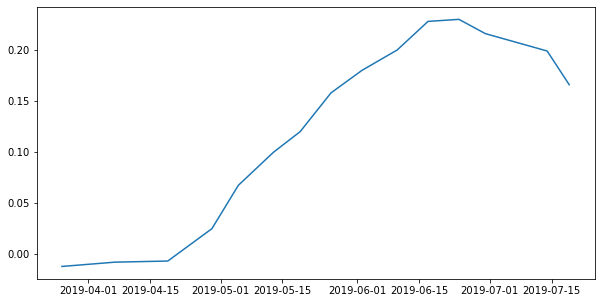

In [40]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['EXG'])

In [41]:
ad_fuller_result = adfuller(data2['EXG'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.9223938616464868
p-value: 0.32160076527344794


In [42]:
data2['EXG'] = np.log(data2['EXG'])
data2['EXG_log_diff'] = data2['EXG'] - data2['EXG'].shift(1)
data2 = data2.dropna()
ad_fuller_result = adfuller(data2['EXG_log_diff'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.636234613132345
p-value: 5.063949445924756e-19


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


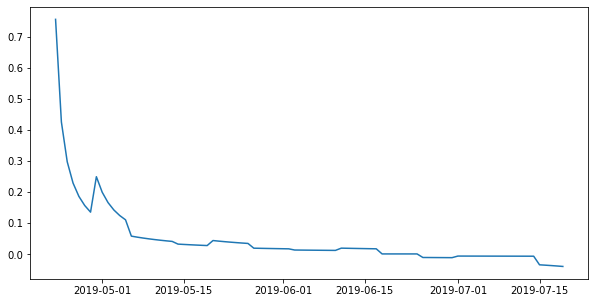

In [43]:
plt.plot(data2['EXG_log_diff'])

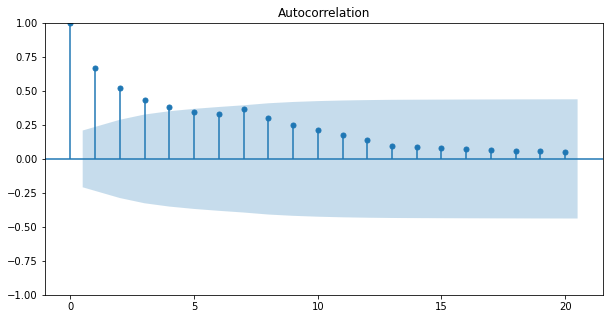

In [44]:
sm.graphics.tsa.plot_acf(data2['EXG_log_diff'].values.squeeze(), lags=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


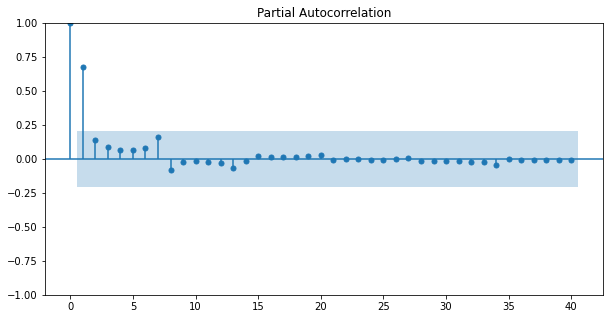

In [45]:
sm.graphics.tsa.plot_pacf(data2['EXG_log_diff'].values.squeeze(), lags=40)
plt.show()

In [46]:
# p can be 1
# q value can be 0
# D is 1
# It is an autoregressive process

In [47]:
train_data = data2[:50]
train_data_1 = train_data['EXG']
train_data_1

Date
2019-04-23   -5.119335
2019-04-24   -4.694001
2019-04-25   -4.396531
2019-04-26   -4.167561
2019-04-27   -3.981373
2019-04-28   -3.824470
2019-04-29   -3.688879
2019-04-30   -3.439419
2019-05-01   -3.239929
2019-05-02   -3.073694
2019-05-03   -2.931194
2019-05-04   -2.806490
2019-05-05   -2.695628
2019-05-06   -2.637184
2019-05-07   -2.581968
2019-05-08   -2.529643
2019-05-09   -2.479919
2019-05-10   -2.432551
2019-05-11   -2.387326
2019-05-12   -2.344058
2019-05-13   -2.302585
2019-05-14   -2.269795
2019-05-15   -2.238047
2019-05-16   -2.207275
2019-05-17   -2.177422
2019-05-18   -2.148434
2019-05-19   -2.120264
2019-05-20   -2.076019
2019-05-21   -2.033649
2019-05-22   -1.993002
2019-05-23   -1.953942
2019-05-24   -1.916351
2019-05-25   -1.880122
2019-05-26   -1.845160
2019-05-27   -1.825464
2019-05-28   -1.806148
2019-05-29   -1.787198
2019-05-30   -1.768601
2019-05-31   -1.750343
2019-06-01   -1.732413
2019-06-02   -1.714798
2019-06-03   -1.701005
2019-06-04   -1.687399
2019-0

In [48]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (1,1,0))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [49]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    EXG   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  98.995
Date:                Wed, 03 Aug 2022   AIC                           -193.990
Time:                        13:35:26   BIC                           -190.207
Sample:                    04-23-2019   HQIC                          -192.555
                         - 06-11-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9930      0.007    133.247      0.000       0.978       1.008
sigma2         0.0009   8.83e-05     10.655      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

<AxesSubplot:xlabel='Date'>

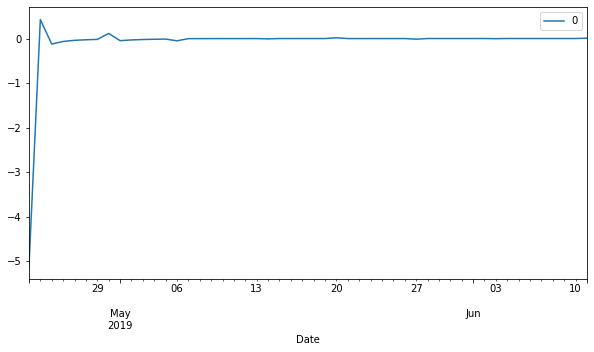

In [50]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

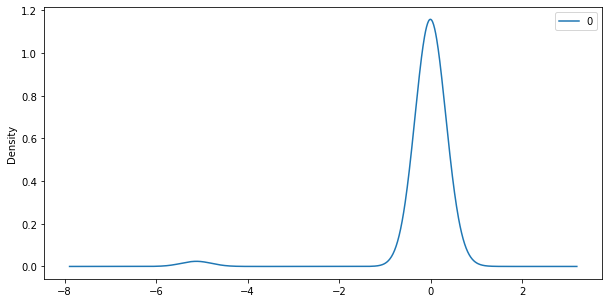

In [51]:
residuals.plot(kind='kde')

In [52]:
residuals.describe()

,0
count,50.000000
mean,-0.101499
std,0.727269
min,-5.119335
25%,-0.011824
50%,-0.001249
75%,-0.000202
max,0.425334


In [53]:
test_data = data2[50:60]
test_data_1 = test_data['EXG']
test_data_1

Date
2019-06-12   -1.570217
2019-06-13   -1.551169
2019-06-14   -1.532477
2019-06-15   -1.514128
2019-06-16   -1.496109
2019-06-17   -1.478410
2019-06-18   -1.477157
2019-06-19   -1.475907
2019-06-20   -1.474657
2019-06-21   -1.473410
Name: EXG, dtype: float64

In [54]:
model_pred = model_fit.forecast(steps = 10)
model_pred_1 = np.exp(model_pred)
model_pred_1

2019-06-12    0.208051
2019-06-13    0.212154
2019-06-14    0.216307
2019-06-15    0.220512
2019-06-16    0.224769
2019-06-17    0.229077
2019-06-18    0.233436
2019-06-19    0.237847
2019-06-20    0.242310
2019-06-21    0.246824
Freq: D, Name: predicted_mean, dtype: float64

In [55]:
test_data_2 = np.exp(test_data_1)
test_data_2

Date
2019-06-12    0.208000
2019-06-13    0.212000
2019-06-14    0.216000
2019-06-15    0.220000
2019-06-16    0.224000
2019-06-17    0.228000
2019-06-18    0.228286
2019-06-19    0.228571
2019-06-20    0.228857
2019-06-21    0.229143
Name: EXG, dtype: float64

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data_2, model_pred_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.008
